In [1]:
import torch

# Definir la función
def f(x):
    return x ** 2

# Punto donde calcular la derivada
x = torch.tensor(2.0)

# Valor pequeño h
h = 0.001

# Calcular la derivada aproximada
f_x_h = f(x + h)
f_x = f(x)
derivada_aprox = (f_x_h - f_x) / h
print(f"Derivada aproximada en x={x.item()}: {derivada_aprox.item()}")

# Derivada exacta
derivada_exacta = 2 * x
print(f"Derivada exacta en x={x.item()}: {derivada_exacta.item()}")


Derivada aproximada en x=2.0: 4.000663757324219
Derivada exacta en x=2.0: 4.0


In [2]:
import torch

# Habilitar cálculo de gradiente
x = torch.tensor(1.0, requires_grad=True)
y = torch.tensor(1.0, requires_grad=True)

# Definir la función
f = x ** 2 + y ** 2

# Calcular el gradiente
f.backward()

# Obtener las derivadas parciales
df_dx = x.grad
df_dy = y.grad
print(f"Derivada parcial respecto a x en (1,1): {df_dx.item()}")
print(f"Derivada parcial respecto a y en (1,1): {df_dy.item()}")


Derivada parcial respecto a x en (1,1): 2.0
Derivada parcial respecto a y en (1,1): 2.0


In [3]:
import torch

# Habilitar cálculo de gradiente
x = torch.tensor(2.0, requires_grad=True)

# Definir funciones internas y composición
def g(x):
    return x ** 2

def f(u):
    return torch.exp(u)

# Composición de funciones
u = g(x)
z = f(u)

# Calcular la derivada de z respecto a x
z.backward()

# Obtener el gradiente
dz_dx = x.grad
print(f"Derivada de z respecto a x en x={x.item()}: {dz_dx.item()}")


Derivada de z respecto a x en x=2.0: 218.39259338378906


In [4]:
import torch

# Datos simples
x_data = torch.tensor([[1.0], [2.0], [3.0]])
y_data = torch.tensor([[2.0], [4.0], [6.0]])

# Definir modelo lineal sencillo
model = torch.nn.Linear(1, 1)

# Definir función de pérdida (Error cuadrático medio)
criterion = torch.nn.MSELoss()

# Definir optimizador (Descenso de gradiente)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Entrenamiento simple
for epoch in range(100):
    # Forward pass
    y_pred = model(x_data)
    loss = criterion(y_pred, y_data)

    # Backward pass
    optimizer.zero_grad()  # Limpiar gradientes anteriores
    loss.backward()        # Calcular gradientes
    optimizer.step()       # Actualizar parámetros

    if epoch % 20 == 0:
        print(f"Epoch {epoch}, Pérdida: {loss.item()}")

# Mostrar parámetros aprendidos
for name, param in model.named_parameters():
    print(f"{name}: {param.data}")


Epoch 0, Pérdida: 22.879850387573242
Epoch 20, Pérdida: 0.2202235460281372
Epoch 40, Pérdida: 0.01360251009464264
Epoch 60, Pérdida: 0.010663899593055248
Epoch 80, Pérdida: 0.009669813327491283
weight: tensor([[1.8911]])
bias: tensor([0.2474])


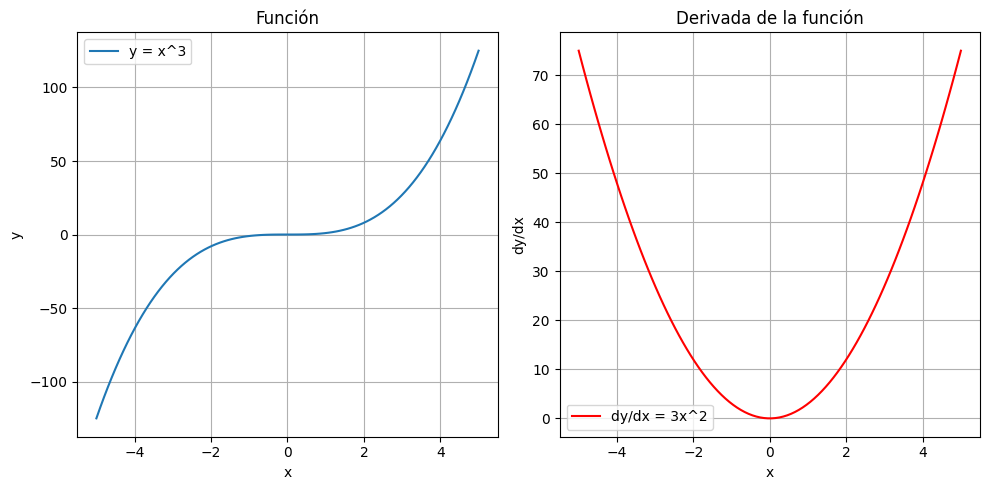

In [5]:
import torch
import matplotlib.pyplot as plt

# Generar datos
x = torch.linspace(-5, 5, steps=100, requires_grad=True)
y = x ** 3

# Calcular la derivada
y.backward(torch.ones_like(x))

# Obtener los gradientes
dy_dx = x.grad

# Convertir a numpy para plotear
x_np = x.detach().numpy()
y_np = y.detach().numpy()
dy_dx_np = dy_dx.detach().numpy()

# Graficar la función y su derivada
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(x_np, y_np, label='y = x^3')
plt.title('Función')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x_np, dy_dx_np, label="dy/dx = 3x^2", color='r')
plt.title('Derivada de la función')
plt.xlabel('x')
plt.ylabel('dy/dx')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


In [6]:
import torch

x = torch.tensor(0.0, requires_grad=True)
f = torch.sin(x) * torch.exp(x)
f.backward()
df_dx = x.grad
print(f"Derivada de f en x=0: {df_dx.item()}")


Derivada de f en x=0: 1.0


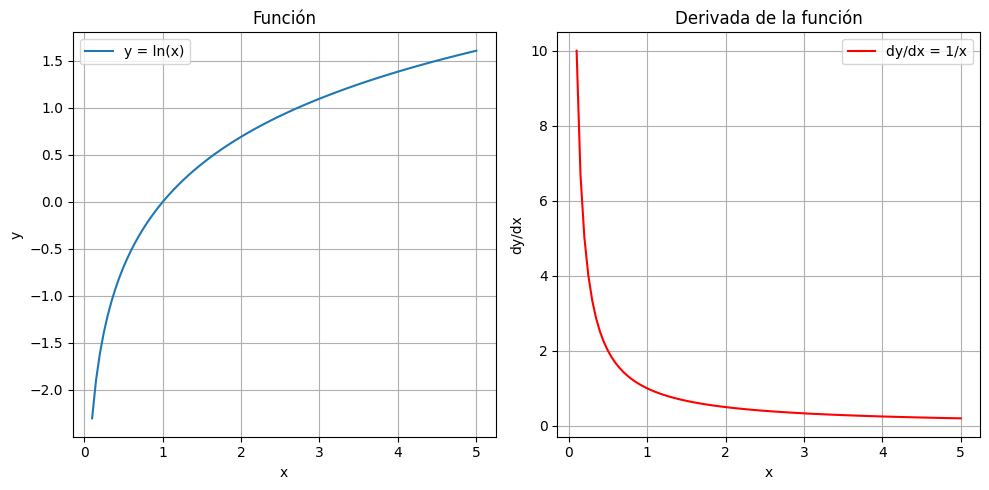

In [7]:
import torch
import matplotlib.pyplot as plt

x = torch.linspace(0.1, 5, steps=100, requires_grad=True)
y = torch.log(x)
y.backward(torch.ones_like(x))
dy_dx = x.grad

x_np = x.detach().numpy()
y_np = y.detach().numpy()
dy_dx_np = dy_dx.detach().numpy()

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(x_np, y_np, label='y = ln(x)')
plt.title('Función')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x_np, dy_dx_np, label="dy/dx = 1/x", color='r')
plt.title('Derivada de la función')
plt.xlabel('x')
plt.ylabel('dy/dx')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


In [8]:
import torch

# Datos simples
x_data = torch.tensor([[1.0], [2.0], [3.0]])
y_data = torch.tensor([[2.0], [4.0], [6.0]])

# Inicializar pesos y sesgos
w = torch.tensor([[0.0]], requires_grad=True)
b = torch.tensor([0.0], requires_grad=True)
lr = 0.01  # Tasa de aprendizaje

# Entrenamiento simple
for epoch in range(100):
    # Forward pass
    y_pred = x_data @ w + b
    loss = torch.mean((y_pred - y_data) ** 2)

    # Backward pass
    loss.backward()

    # Actualizar parámetros manualmente
    with torch.no_grad():
        w -= lr * w.grad
        b -= lr * b.grad

    # Resetear gradientes
    w.grad.zero_()
    b.grad.zero_()

    if epoch % 20 == 0:
        print(f"Epoch {epoch}, Pérdida: {loss.item()}")

print(f"Peso aprendido: {w.item()}, Sesgo aprendido: {b.item()}")


Epoch 0, Pérdida: 18.66666603088379
Epoch 20, Pérdida: 0.23933714628219604
Epoch 40, Pérdida: 0.06582852452993393
Epoch 60, Pérdida: 0.05841260030865669
Epoch 80, Pérdida: 0.05303886532783508
Peso aprendido: 1.7450770139694214, Sesgo aprendido: 0.5794646143913269
